# Python lecture - 31/03/2023

In this lecture we'll use the scikit-learn library (and analyze images).
With this lib we can:
- preprocess data
- use classifiers, e.g. logistic regression (see 1.1.11 in docs)
- support vector machines
- ready-to-use datasets
Let's now import what we need.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

Logistic regression is a different model from the simple perceptron: we can produce different models basing on constraints.
It performs linear separation between classes with its own model + LMS minimization (log likelihood).
So it gives the probability that a data is into a class or another.
**NOTE** In medical cases we want our model to be understandable (we don't like to blackbox the health system), then we'll prefer a decision tree (for example).

In [10]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='pandas')

$X$ represent the actual image while $y$ represents its label.
Usually supervised learning > clustering.
We want to avoid overtraining of course, i.e. we want to generalize our model (in order to apply it to new data).
So let's split our data into two sets: one for training and one for testing.
We can also use cross validation as described in theoretical lectures (very used in real applications).

In [15]:
X.shape, X.dtype, y.shape, y.dtype

((70000, 784), dtype('int64'), (70000,), dtype('O'))

Shape is strange: it has been flattened (i.e. vectorized).
We don't care where a pixel is, at least in this analysis.
Why int64?
If unsigned, 255 + 1 = 0 (*no buono*).
For a standard int we don't have this problem plus we can cast it as unsigned.
Notice that:

In [16]:
X.max(), X.min()

(255, 0)

This dataset consists in low resolution images of handwritten numbers.
Gray level images are a matrix of unsigned integers (8-bit long).
Color images are tensor (RGB, one matrix per color).
Pixels are our descriptive variables.

In matplotlib, an axis is a subfeature (in one figure we can have multiple axis).
Reshape function -> we can reshape an array as we want.
Cmap -> color map of the image. Wrong color map can mislead your decision so chose it carefully.

Text(0.5, 1.0, '0')

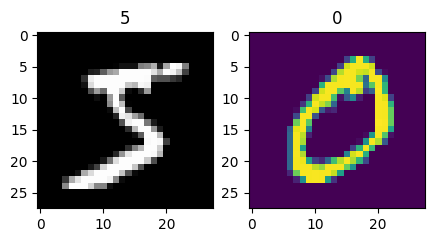

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
ax1.imshow(X[0].reshape(28, 28), cmap='gray')
ax2.imshow(X[1].reshape(28, 28), cmap='viridis')

ax1.set_title(label=y[0])
ax2.set_title(label=y[1])

Our goal is to build a thing that classifies those numbers, so *trainiaml*.
**NOTE** Wrong preprocessing is very spread, pay attention!
Let's prepare the data by splitting the dataset:

In [20]:
train_samples = int(5e3)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=int(1e4))
X_train.shape, X_test.shape

((5000, 784), (10000, 784))

The division is made in the way the data are mutually excluded (seemed obvious but let's remark it).
Let's standardize parameters in order to work with number between 0 and 1 (i.e. don't let the pC explode **BOOM**).
Standardize could also mean to normalize data in a std gaussian (0 mean and 1 variance) with fit_transform function.
For the test data we only use transform, why?
We shouldn't really know test data, so we fit only on the training data.
Computing mean and variance for test data imply introducing information we usually don't have.
Transform will transform the test data with the mean and the variance of the training data.
**NOTE** All scikit function are enabled only after *fitting*.

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Calling the mean function on X we compute the mean all over the images' pixel by pixel.
Then, the result consist in an image composed by all average values.

Calling min-max we can notice that standardizing we passed from int -> floating point.

In [24]:
X.min(), X.max(), X_train.min(), X_train.max()

(0, 255, -1.2689498262788907, 70.70360669726432)

To do the regression we need to define the LogisticRegression object (minimize the log likelihood).
We can put some constraint: l1 == keep only a small portion of parameters (features) of the initial sample.
The l2 penalization is less stricted.
If we can exclude some redundant pixels we can reduce the problem's dimensionality.
Too strong regularization (penalization) -> all to 0, too low -> no effect.
The $C$ coefficient is the weight we give to a term in the minimization.
The solver is just the algorithm used by scikit-learn.
Some solvers cannot be used for multiclass classification so chose wisely.
We can also define the tolerance (0.1 in our case).
Then we fit the model and compute the score.

In [25]:
clf = LogisticRegression(C=50. / train_samples, penalty='l1', solver='saga', tol=0.1)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

The score is the accuracy.

In [26]:
score

0.8402

We can also make a prediction for a given sample.

array(['3'], dtype=object)

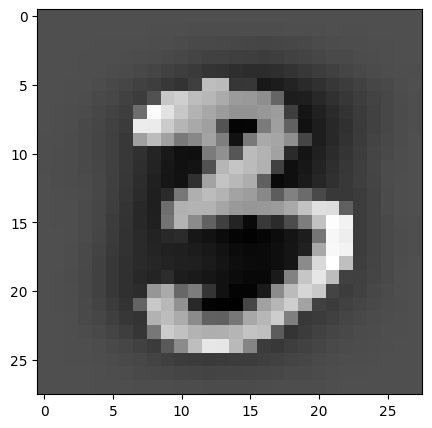

In [32]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.imshow(X_test[0].reshape(28, 28), cmap='gray')

pred = clf.predict(X_test[0].reshape(1, -1))
pred
